The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:

- Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

- Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

- Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

- Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.

**Objective for Exercise:**

Use your data analysis tools to ingest a dataset, clean it, and wrangle it.


The goal of this exercise is to do explore the data to find the answer to the Question 2 problem statement:

**Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?**

In this exercise, you will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type you decided to focus at the end of the last exercise.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(0)
np.set_printoptions(suppress=True)

### Reload Modified Dataset

In [2]:
df = pd.read_csv("311mod.csv", na_values=np.nan)

In [3]:
df

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
1,45529784,02/02/2020 02:15:24 PM,UNSANITARY CONDITION,11204.0,1751 67 STREET,BROOKLYN,Open,BROOKLYN
2,45527528,02/02/2020 02:27:41 AM,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,Jackson Heights,Open,QUEENS
3,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
4,45528814,02/02/2020 01:59:44 PM,APPLIANCE,11209.0,223 78 STREET,BROOKLYN,Open,BROOKLYN
...,...,...,...,...,...,...,...,...
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019839,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN
6019841,44063726,10/15/2019 02:07:34 PM,HEAT/HOT WATER,10467.0,66 WEST GUN HILL ROAD,BRONX,Closed,BRONX


### Exploratory Data Analysis

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unique Key        6019843 non-null  int64  
 1   Created Date      6019843 non-null  object 
 2   Complaint Type    6019843 non-null  object 
 3   Incident Zip      5939146 non-null  float64
 4   Incident Address  5967018 non-null  object 
 5   City              5939569 non-null  object 
 6   Status            6019843 non-null  object 
 7   Borough           6019843 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 367.4+ MB


In [5]:
df.describe()

,Unique Key,Incident Zip
count,6.019843e+06,5.939146e+06
mean,2.956254e+07,1.074698e+04
std,7.909439e+06,5.130236e+02
min,1.562973e+07,1.000100e+04
25%,2.291225e+07,1.045200e+04
50%,2.931010e+07,1.046900e+04
75%,3.583163e+07,1.122300e+04
max,4.553204e+07,1.234500e+04


In [6]:
df.columns

Index(['Unique Key', 'Created Date', 'Complaint Type', 'Incident Zip',
       'Incident Address', 'City', 'Status', 'Borough'],
      dtype='object')

### Replace and combine Heat/Hot Water and Heating

In [7]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Electric                        1
Mold          

In [8]:
df["Complaint Type"] = df["Complaint Type"].replace(to_replace="HEATING", value="HEAT/HOT WATER")

In [9]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            2149424
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                6
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: Complain

In [ ]:
#df.to_csv("311mod2.csv",index=False)

### Subset HEAT/HOT WATER only

In [10]:
df2 = df[df["Complaint Type"] == "HEAT/HOT WATER"]

In [11]:
df2

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
2,45527528,02/02/2020 02:27:41 AM,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,Jackson Heights,Open,QUEENS
3,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
5,45530344,02/02/2020 07:52:08 AM,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX
7,45527939,02/02/2020 09:00:54 AM,HEAT/HOT WATER,11372.0,37-20 81 STREET,Jackson Heights,Open,QUEENS
...,...,...,...,...,...,...,...,...
6019836,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019838,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
6019839,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
6019840,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN


In [12]:
df2["Incident Zip"].value_counts()

11226.0    69041
10467.0    66073
10458.0    65372
10468.0    58190
10453.0    57818
           ...  
10103.0        1
10112.0        1
10121.0        1
10129.0        1
12345.0        1
Name: Incident Zip, Length: 193, dtype: int64

In [13]:
df2["Incident Address"].value_counts()

34 ARDEN STREET          13858
89-21 ELMHURST AVENUE    11548
3810 BAILEY AVENUE        7115
1025 BOYNTON AVENUE       5785
9511 SHORE ROAD           5006
                         ...  
1633 EAST 172 STREET         1
1214 DEAN STREET             1
115-12 MARSDEN STREET        1
8016 6 AVENUE                1
27 EAST 62 STREET            1
Name: Incident Address, Length: 136949, dtype: int64

In [14]:
df2["City"].value_counts()

BRONX            688741
BROOKLYN         662704
NEW YORK         477518
Jamaica           22158
STATEN ISLAND     21668
                  ...  
Breezy Point         58
New Hyde Park        52
FLORAL PARK          40
BREEZY POINT          8
NEW HYDE PARK         5
Name: City, Length: 89, dtype: int64

In [15]:
df2["Status"].value_counts()

Closed     2133331
Open         16091
Pending          2
Name: Status, dtype: int64

In [16]:
df2["Borough"].value_counts()

BRONX            606133
BROOKLYN         574845
MANHATTAN        423039
Unspecified      282917
QUEENS           244122
STATEN ISLAND     18368
Name: Borough, dtype: int64

## Result: Borough BRONX, Address 34 ARDEN STREET, Zip is 11226.0

### Correlation

In [17]:
df2.corr()

,Unique Key,Incident Zip
Unique Key,1.000000,-0.009804
Incident Zip,-0.009804,1.000000


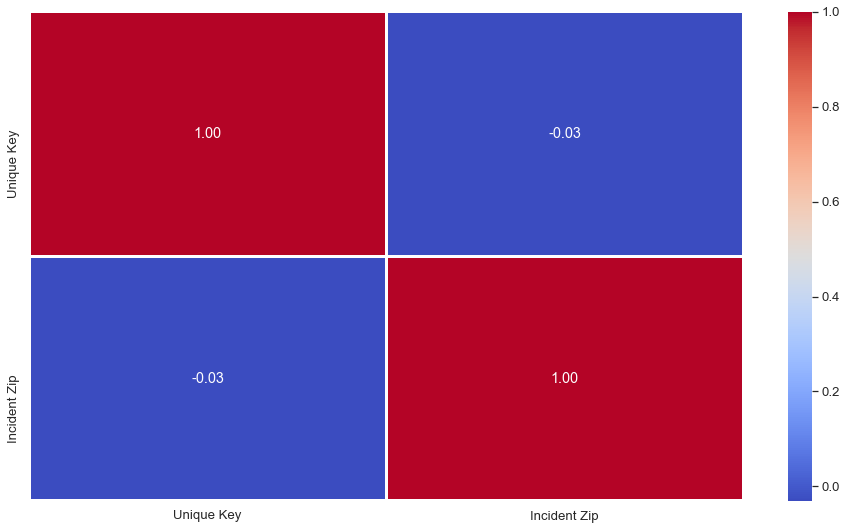

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [19]:
df2.reset_index(drop=True,inplace=True)

In [20]:
df2

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45531130,02/02/2020 06:09:17 AM,HEAT/HOT WATER,10019.0,426 WEST 52 STREET,NEW YORK,Open,MANHATTAN
1,45527528,02/02/2020 02:27:41 AM,HEAT/HOT WATER,11372.0,87-15 37 AVENUE,Jackson Heights,Open,QUEENS
2,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
3,45530344,02/02/2020 07:52:08 AM,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX
4,45527939,02/02/2020 09:00:54 AM,HEAT/HOT WATER,11372.0,37-20 81 STREET,Jackson Heights,Open,QUEENS
...,...,...,...,...,...,...,...,...
2149419,44063680,10/15/2019 06:43:56 PM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
2149420,44063685,10/15/2019 10:35:45 AM,HEAT/HOT WATER,10029.0,327 EAST 108 STREET,NEW YORK,Closed,MANHATTAN
2149421,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX
2149422,44063724,10/15/2019 10:54:45 AM,HEAT/HOT WATER,10034.0,165 SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN


In [21]:
#Save to csv for Heat cases
#df2.to_csv("heat.csv",index=False)

### Choose Borough column for easier preprocessing

In [22]:
df3 = df2[df2["Borough"] == "BRONX"]

In [23]:
df3

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
2,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
3,45530344,02/02/2020 07:52:08 AM,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX
6,45530349,02/02/2020 05:38:39 AM,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX
12,45529362,02/02/2020 01:38:25 PM,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX
18,45528454,02/02/2020 10:25:32 PM,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX
...,...,...,...,...,...,...,...,...
2149416,44063661,10/15/2019 10:13:11 PM,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX
2149417,44063670,10/15/2019 08:25:25 AM,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX
2149418,44063671,10/15/2019 09:32:54 AM,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX
2149421,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX


In [24]:
df3["City"].unique()

array(['BRONX', nan], dtype=object)

In [25]:
df3["Borough"].unique()

array(['BRONX'], dtype=object)

In [26]:
df3.reset_index(drop=True, inplace=True)

In [27]:
df3

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
0,45530329,02/02/2020 12:13:18 PM,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX
1,45530344,02/02/2020 07:52:08 AM,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX
2,45530349,02/02/2020 05:38:39 AM,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX
3,45529362,02/02/2020 01:38:25 PM,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX
4,45528454,02/02/2020 10:25:32 PM,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX
...,...,...,...,...,...,...,...,...
606128,44063661,10/15/2019 10:13:11 PM,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX
606129,44063670,10/15/2019 08:25:25 AM,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX
606130,44063671,10/15/2019 09:32:54 AM,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX
606131,44063692,10/15/2019 06:09:28 AM,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606133 entries, 0 to 606132
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unique Key        606133 non-null  int64  
 1   Created Date      606133 non-null  object 
 2   Complaint Type    606133 non-null  object 
 3   Incident Zip      600147 non-null  float64
 4   Incident Address  606132 non-null  object 
 5   City              600147 non-null  object 
 6   Status            606133 non-null  object 
 7   Borough           606133 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.0+ MB


In [29]:
#df3.to_csv("bronx311.csv",index=False)

In [32]:
df3 = pd.read_csv("bronx311.csv", parse_dates=["Created Date","Date"])

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606133 entries, 0 to 606132
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unique Key        606133 non-null  int64         
 1   Created Date      606133 non-null  datetime64[ns]
 2   Complaint Type    606133 non-null  object        
 3   Incident Zip      600147 non-null  float64       
 4   Incident Address  606132 non-null  object        
 5   City              600147 non-null  object        
 6   Status            606133 non-null  object        
 7   Borough           606133 non-null  object        
 8   Date              606133 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 41.6+ MB


In [34]:
df3

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough,Date
0,45530329,2020-02-02 12:13:18,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX,2020-02-02
1,45530344,2020-02-02 07:52:08,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX,2020-02-02
2,45530349,2020-02-02 05:38:39,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX,2020-02-02
3,45529362,2020-02-02 13:38:25,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX,2020-02-02
4,45528454,2020-02-02 22:25:32,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX,2020-02-02
...,...,...,...,...,...,...,...,...,...
606128,44063661,2019-10-15 22:13:11,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX,2019-10-15
606129,44063670,2019-10-15 08:25:25,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX,2019-10-15
606130,44063671,2019-10-15 09:32:54,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX,2019-10-15
606131,44063692,2019-10-15 06:09:28,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX,2019-10-15


In [35]:
df3["Date"] = df3["Created Date"].dt.date

In [36]:
df3

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough,Date
0,45530329,2020-02-02 12:13:18,HEAT/HOT WATER,10458.0,2405 SOUTHERN BOULEVARD,BRONX,Open,BRONX,2020-02-02
1,45530344,2020-02-02 07:52:08,HEAT/HOT WATER,10456.0,1131 MORRIS AVENUE,BRONX,Open,BRONX,2020-02-02
2,45530349,2020-02-02 05:38:39,HEAT/HOT WATER,10459.0,1032 ALDUS STREET,BRONX,Open,BRONX,2020-02-02
3,45529362,2020-02-02 13:38:25,HEAT/HOT WATER,10473.0,880 BOYNTON AVENUE,BRONX,Open,BRONX,2020-02-02
4,45528454,2020-02-02 22:25:32,HEAT/HOT WATER,10463.0,3110 KINGSBRIDGE TERRACE,BRONX,Open,BRONX,2020-02-02
...,...,...,...,...,...,...,...,...,...
606128,44063661,2019-10-15 22:13:11,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,BRONX,Closed,BRONX,2019-10-15
606129,44063670,2019-10-15 08:25:25,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,BRONX,Closed,BRONX,2019-10-15
606130,44063671,2019-10-15 09:32:54,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BRONX,Closed,BRONX,2019-10-15
606131,44063692,2019-10-15 06:09:28,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRONX,Closed,BRONX,2019-10-15


In [37]:
df3.groupby("Date").count()

,Unique Key,Created Date,Complaint Type,Incident Zip,Incident Address,City,Status,Borough
Date,,,,,,,,
2010-01-01,1,1,1,1,1,1,1,1
2010-01-05,2,2,2,2,2,2,2,2
2010-01-09,1,1,1,1,1,1,1,1
2010-01-13,1,1,1,1,1,1,1,1
2010-01-18,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
2020-01-29,340,340,340,340,340,340,340,340
2020-01-30,385,385,385,385,385,385,385,385
2020-01-31,238,238,238,238,238,238,238,238


In [38]:
#df3.to_csv("bronx311.csv",index=False)